**Welcome to this exploration of 10000 movies!** 


---


What do I want to figure out with this data?
 
 I will sift through over 10,000 movie titles in order to discover valuable relationships between variables such as revenues, genres, and popularity. 





              

---


           
# **Step 1:**
##**Data Wrangling**
######**Gather, load, and assess the data.**

*In this step,
I will be looking for missing and problems in quality. 
I will be planing for making modifications, Such as replacing information and removing duplicates to ensure my dataset is clean for analysis*

In [21]:
# import all libraries I'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [22]:
# Gather data: load data and print out a few lines.

df= pd.read_csv('Movies.csv',
                 lineterminator='\n')
df.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.


There is lots of information here and also much that I'm not concerned with. 


*  ` genre ` column has multiple strings of information that should be separated out.   
*   I'll replace `'release_date'` with a `release_year` column since I'm more interested just in the release year.
*   I'll add a column for all the `decades`.






In [23]:
# Assess number of rows and columns of dataset
df.shape

(10000, 13)

In [24]:
# Assess summary of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   id                 10000 non-null  int64  
 2   original_language  10000 non-null  object 
 3   original_title     10000 non-null  object 
 4   popularity         10000 non-null  float64
 5   release_date       9962 non-null   object 
 6   vote_average       10000 non-null  float64
 7   vote_count         10000 non-null  int64  
 8   genre              10000 non-null  object 
 9   overview           9900 non-null   object 
 10  revenue            10000 non-null  int64  
 11  runtime            9991 non-null   float64
 12  tagline            7080 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


There is missing row data for some columns, But I plan on removing these columns since they I dont need them. I'll convert `release_date` type from object to int, Next I'll assess statistics for the columns.

 Now I'll drop some columns they aren't directly relevant to my questions, I'll dropping `id`, `overview`, `tagline` and `Unnamed: 0`.  


In [25]:
# Drop columns they I don't want it
df.drop(['id', 'overview', 'tagline', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,revenue,runtime
0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",424000000,97.0
1,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",165000000,157.0
2,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']",331116356,155.0
3,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",0,127.0
4,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",331096766,115.0


In [26]:
# Convert the type of column from object to float and print just the year
df['release_date'] = pd.DatetimeIndex(df['release_date']).year
# Changing a specific column name
df.rename(columns={'release_date':'release_year'}, inplace=True)

In [27]:
# Assess statistics for each column
df.describe()

,popularity,release_year,vote_average,vote_count,revenue,runtime
count,10000.000000,9962.000000,10000.00000,10000.000000,1.000000e+04,9991.000000
mean,34.516871,2007.518571,6.29875,1315.084900,5.736388e+07,98.773596
std,100.693958,14.665309,1.43426,2501.899103,1.480771e+08,28.800581
min,6.269000,1902.000000,0.00000,0.000000,0.000000e+00,0.000000
25%,11.908000,2002.000000,5.90000,118.000000,0.000000e+00,89.000000
50%,17.488000,2012.000000,6.50000,425.500000,5.912300e+05,99.000000
75%,29.626250,2018.000000,7.10000,1297.250000,4.764549e+07,113.000000
max,5401.308000,2028.000000,9.50000,30184.000000,2.847246e+09,400.000000


Notable findings:

`popularity` ranges from 6 - 5401.  

`vote_average` from 0 to 9.5. 

`revenue`  ranges from  0 - 3 billion 

`release years` range from 1902 - 2028 (average 2010, most were released after 1940) 

In [28]:
# Assess if there are any duplicates.
sum(df.duplicated())

0

In [29]:
# Assess if any rows have missing values
df.isnull().sum()

original_language     0
original_title        0
popularity            0
release_year         38
vote_average          0
vote_count            0
genre                 0
revenue               0
runtime               9
dtype: int64

There are no duplicates and 
I'll view the rows with missing information on `runtime` and `release_year` to assess if it's ok to drop, I'd like to order by `runtime` to get a sense if these are full feature length movies.




In [30]:
# List All missing values order by runtime. 
df[df.isnull().any(axis=1)].sort_values(['runtime'], ascending=True)

,original_language,original_title,popularity,release_year,vote_average,vote_count,genre,revenue,runtime
564,en,Untitled Peaky Blinders Film,100.232,NaN,0.0,0,[],0,0.0
9581,es,El sexo me da risa 7,13.090,NaN,5.0,1,[],0,0.0
7727,en,Barbie,11.329,NaN,0.0,0,['Comedy'],0,0.0
7655,en,Hocus Pocus 2,9.594,NaN,0.0,0,"['Fantasy', 'Family', 'Comedy']",0,0.0
7497,en,Happy Death Day to Us,12.127,NaN,0.0,0,"['Thriller', 'Comedy']",0,0.0
7087,es,Gekijô ban poketto monsutâ: Daiamondo & Pâru -...,10.230,NaN,0.0,0,[],0,0.0
7023,en,Chucky Boy Blue,11.747,NaN,0.0,0,[],0,0.0
6997,en,Blade,9.506,NaN,0.0,0,"['Action', 'Fantasy']",0,0.0
6030,en,My Hero Academia,17.816,NaN,0.0,0,[],0,0.0
5980,fr,True Stories Scream,13.589,NaN,0.0,0,['Documentary'],0,0.0


Looks like these movies have no `runtime`, and/or `genre`, I'm comfortable with removing them. 

I'll review `popularity`, `vote_count`, and `vote_average` more closely. Remove any outliers?

In [31]:
# print first 15 rows for some columns order by popularity
df[['original_title','popularity', 'vote_count', 'vote_average']].sort_values('popularity', ascending=False).head(15)

,original_title,popularity,vote_count,vote_average
0,Venom: Let There Be Carnage,5401.308,1736,6.8
1,Eternals,3365.535,622,7.1
2,Dune,2911.423,3632,8.0
3,Army of Thieves,2552.437,555,6.9
4,Free Guy,1850.470,3493,7.8
5,Gunpowder Milkshake,1453.423,347,6.5
12,Shang-Chi and the Legend of the Ten Rings,1327.180,1414,7.7
6,Venom,1212.352,12126,6.8
9,American Badger,1148.822,14,6.3
11,劇場版 七つの大罪 光に呪われし者たち,1108.815,210,8.4


In [32]:
# print last 5 rows for some columns order by popularity
df[['original_title','popularity', 'vote_count', 'vote_average']].sort_values('popularity', ascending=False).tail()

,original_title,popularity,vote_count,vote_average
9357,Auntie Mame,6.338,72,7.0
9520,巨乳ドラゴン 温泉ゾンビVSストリッパー5,6.330,27,5.6
9458,"Steamboat Bill, Jr.",6.325,222,7.7
9839,Si on chantait,6.269,12,7.1
9513,Проклятый чиновник,6.269,3,4.7


Doesn't look like there are outliers for `popularity`, Just a wide range of values. Will keep as it is.

For `vote_average`, some only have 3 votes while others have upwards of 12,000.



---


#**Step 2:**

####**Data Exploration.**
######Augment the data, Remove outliers, Create better features. 

In [33]:
# Drop rows with missing information. 
df.dropna(inplace=True) 
print(df.isnull().sum().any()) 
# Assess summary of dataset.
print(df.info())

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9953 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  9953 non-null   object 
 1   original_title     9953 non-null   object 
 2   popularity         9953 non-null   float64
 3   release_year       9953 non-null   float64
 4   vote_average       9953 non-null   float64
 5   vote_count         9953 non-null   int64  
 6   genre              9953 non-null   object 
 7   revenue            9953 non-null   int64  
 8   runtime            9953 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 777.6+ KB
None


I'll create a column for all the `decades`, By `release_years` range from 1902 to 2028.




In [67]:
# Creat edges and names for decades
bin_edges = [1900, 1909, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2029]
bin_names = ['teens', 'tweenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties', 'two_thousands', 'two_thousand_tens', 'two_thousand_tweenties']
df['decades'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)
df.head()

,original_language,original_title,popularity,release_year,vote_average,vote_count,genre,revenue,runtime,decades
0,en,Venom: Let There Be Carnage,5401.308,2021.0,6.8,1736,"'ScienceFiction','Action','Adventure'",424000000,97.0,two_thousand_tweenties
1,en,Eternals,3365.535,2021.0,7.1,622,"'Action','Adventure','ScienceFiction','Fantasy'",165000000,157.0,two_thousand_tweenties
2,en,Dune,2911.423,2021.0,8.0,3632,"'Action','Adventure','ScienceFiction'",331116356,155.0,two_thousand_tweenties
3,en,Army of Thieves,2552.437,2021.0,6.9,555,"'Action','Crime','Thriller'",0,127.0,two_thousand_tweenties
4,en,Free Guy,1850.470,2021.0,7.8,3493,"'Comedy','Action','Adventure','ScienceFiction'",331096766,115.0,two_thousand_tweenties


now I'll deal with the `genre` column that have multiple values per cell, I'll create separate dataframes. 

I want to split up the `genres` column cells so I can tally each genre individually. Next I'll remove the '`genres`' column (with multiple values) and replace it with a '`genre`' column (with single values). Then I'll make sure that there is a new row for each `genre` (stacked), so there will be multiple rows with the same `original_title`.

In [68]:
df['genre'].str.contains(',')
df['genre'].nunique()

2310

In [40]:
# original df intact.
df_split_genre = df.copy()
split_genre = df_split_genre['genre'].str.split(',').apply(pd.Series, 1 ).stack().reset_index(level=1, drop=True)
split_genre.name = 'genre_split'
df_split_genre = df_split_genre.drop(['genre'], axis=1).join(split_genre)

In [41]:
# remove characters
df['genre'] = df.genre.str.replace(r'[','', regex = True)
df['genre'] = df.genre.str.replace(r']','', regex = True)
df['genre'] = df.genre.str.replace(r' ','', regex = True)

In [42]:
df_split_genre['genre_split'].unique()

array(["'ScienceFiction'", "'Action'", "'Adventure'", "'Fantasy'",
       "'Crime'", "'Thriller'", "'Comedy'", "'Horror'", "'Animation'",
       "'Family'", "'Mystery'", "'Drama'", "'Romance'", "'Music'",
       "'Western'", "'TVMovie'", "'History'", "'War'", "'Documentary'",
       ''], dtype=object)

In [69]:
# Assess summary and number of rows and columns and if there are any duplicates.
print(df_split_genre.info())
print(df_split_genre.shape)
print(sum(df_split_genre.duplicated()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25682 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   original_language  25682 non-null  object  
 1   original_title     25682 non-null  object  
 2   popularity         25682 non-null  float64 
 3   release_year       25682 non-null  float64 
 4   vote_average       25682 non-null  float64 
 5   vote_count         25682 non-null  int64   
 6   revenue            25682 non-null  int64   
 7   runtime            25682 non-null  float64 
 8   decades            25682 non-null  category
 9   genre_split        25682 non-null  object  
dtypes: category(1), float64(4), int64(2), object(3)
memory usage: 2.0+ MB
None
(25682, 10)
0


there is 1 duplicate row, I'll drop it

In [70]:
# drop duplicates
df_split_genre.drop_duplicates(inplace=True)

In [71]:
# Assess if any rows have missing values
df_split_genre.isnull().sum()

original_language    0
original_title       0
popularity           0
release_year         0
vote_average         0
vote_count           0
revenue              0
runtime              0
decades              0
genre_split          0
dtype: int64

And We now have 25,683 rows (from 10,000) and 10 columns (same), which makes sense, and no duplicate rows and no null values. 



---


##**step 3**
####**Conclusions, Exploratory Data Analysis**
In this section, I'll summarize the relationships for compute statistics and make predictions with, To answer our questions and present our findings visually.



## **1.   Which type of movies are more popular?**




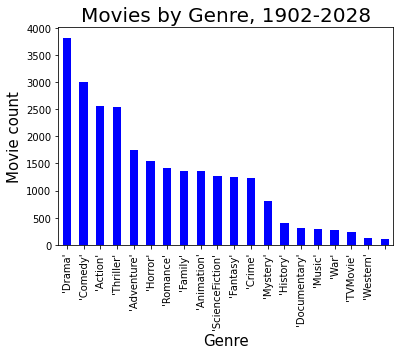

In [59]:
df_split_genre['genre_split'].value_counts().plot(kind='bar', color='b');
plt.title('Movies by Genre, 1902-2028', size=20)
plt.xlabel('Genre', size=15)
plt.ylabel('Movie count', size=15);

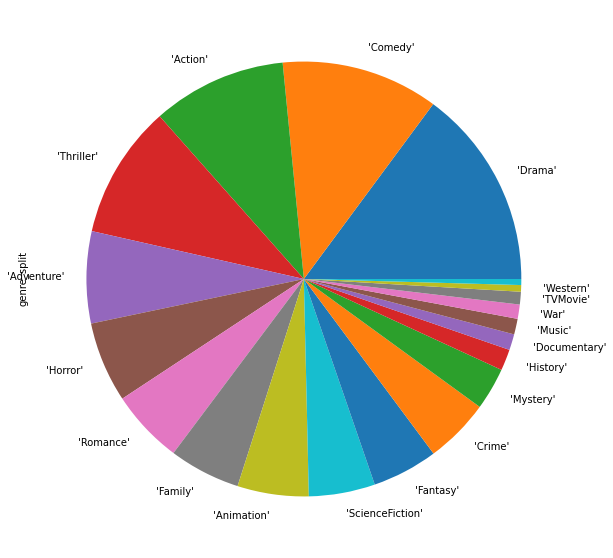

In [65]:
df_split_genre['genre_split'].value_counts().plot(kind='pie', figsize=(10,10))

Drama, Comedy, Action, Thriller and Adventure are the most popular genres in general. The pie chart is a better visual since we can assess that these top 5 genres make up about 50% of all movies. TV Movies, Westerns, and War are the least popular genres.

Do these genres hold true throughout the decades?

In [151]:
genres_decades = df_split_genre.groupby(['decades'])['genre_split'].value_counts() 
genres_decades.groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

decades                 genre_split     
teens                   'Adventure'            1
                        'Fantasy'              1
                        'ScienceFiction'       1
tweenties               'Drama'                8
                        'Comedy'               5
                        'Action'               4
thirties                'Drama'               11
                        'Horror'               6
                        'Adventure'            5
forties                 'Drama'               21
                        'Thriller'            12
                        'Comedy'              11
fifties                 'Drama'               50
                        'Romance'             24
                        'Comedy'              15
sixties                 'Drama'               64
                        'Adventure'           39
                        'Comedy'              38
seventies               'Drama'               99
                        'Act

Drama is the most popular genre for every decade except for the 80's which is Comedy.

## **2.    what are the most popular languages in movies?**

In [135]:
genres_decades = df.groupby(['original_language'])['original_language'].value_counts()
genres_decades.groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

original_language
ar       1
be       1
bn       1
ca       1
cn      79
cs       6
da      30
de      78
el       3
en    7763
es     412
eu       2
fa       5
fi       6
fr     292
ga       1
he       9
hi      30
hu       4
id      15
is       2
it     104
ja     606
ka       1
ko     139
la       1
lv       3
ml       1
ms       1
nb       1
nl      19
no      24
pl      19
pt      53
ro       2
ru      69
sk       1
sr       4
sv      22
ta       2
te       3
th      15
tl       3
tr      10
uk       5
ur       1
zh     103
Name: original_language, dtype: int64

English is the most popular language then Japanese, Spanish and French.   


## **3.   What are the Top 10 movies with maximum vote average?**


In [112]:
df[['original_title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(10)

,original_title,vote_average
5010,Ebola Zombies,9.5
7043,Bob Esponja: Días de Cangreburgers,9.5
577,鬼滅の刃 兄妹の絆,9.4
2132,Јужни Ветар 2: Убрзање,9.3
6347,French Lolita,9.3
5238,번 더 스테이지: 더 무비,9.2
4835,Franco Escamilla: Por La Anécdota,9.2
9772,Mr. Robot: Behind the Mask,9.1
8020,Colegialas lesbianas y el placer de pervertir,9.1
5835,พร้อมรัก ยัยตุ๊กตาซ้อมรัก,9.0


## **4. Display analysis of the revenue trend over the decades.**


decades
teens                     0.000000e+00
tweenties                 6.566715e+05
thirties                  1.366846e+07
forties                   2.180751e+07
fifties                   2.039836e+07
sixties                   2.141126e+07
seventies                 3.717746e+07
eighties                  5.025511e+07
nineties                  7.969013e+07
two_thousands             8.228045e+07
two_thousand_tens         6.136485e+07
two_thousand_tweenties    9.479921e+06
Name: revenue, dtype: float64


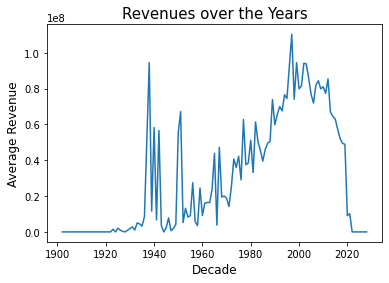

In [142]:
rev = df.groupby('release_year')['revenue'].mean()
print(df.groupby('decades')['revenue'].mean())
plt.plot(rev)
plt.title('Revenues over the Years', size=15);
plt.xlabel('Decade', size=12)
plt.ylabel('Average Revenue', size=12);

Revenues over the years have increased from 3 to 10. 

## **5. Display analysis of the trend of movie runtime.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


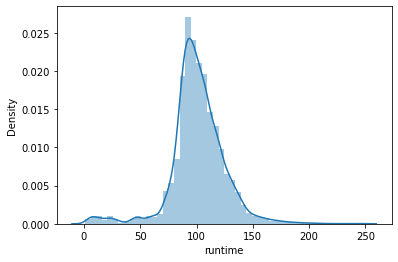

In [117]:
sns.distplot(df[(df['runtime']<300)&(df['runtime']>0)]['runtime'])

As the plot describes Most movies has an runtime between 90 mins to 120 mins.




## **6. Are specific genres associated with higher revenues?**

I'll find the top 100 movies in box office revenues to create filters (new dataframes) for the top grossing and below

In [140]:
df_top_hundred = df.sort_values(by=['revenue'], ascending=False).head(100)
df_top_hundred['original_title'].nunique()

99

In [91]:
df_top_hundred.describe()

,popularity,release_year,vote_average,vote_count,revenue,runtime
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,122.865650,2011.320000,7.258000,13271.420000,1.069005e+09,132.540000
std,136.876208,7.793911,0.658462,5421.331659,3.740038e+08,24.204691
min,16.642000,1977.000000,5.800000,176.000000,7.634556e+08,87.000000
25%,60.302250,2007.750000,6.800000,9013.250000,8.529828e+08,118.000000
50%,93.262500,2013.500000,7.300000,12640.000000,9.572099e+08,133.500000
75%,136.721000,2017.000000,7.700000,16944.750000,1.124915e+09,148.000000
max,1212.352000,2019.000000,8.500000,30184.000000,2.847246e+09,201.000000


The min revenue for the top 100 movies is 7.634556e+08
I'll create two filters with the split_genre dataframe: The top 100 grossing movies and below

In [141]:
below_hundred = df_split_genre.query('revenue < 7.634556e+08')
top_hundred = df_split_genre.query('revenue >= 7.634556e+08')
print(below_hundred['genre_split'].value_counts().nlargest(5))
print(top_hundred['genre_split'].value_counts().nlargest(5))

'Drama'        3807
'Comedy'       2983
'Thriller'     2539
'Action'       2503
'Adventure'    1668
Name: genre_split, dtype: int64
'Adventure'         85
'Action'            61
'Fantasy'           41
'ScienceFiction'    33
'Family'            25
Name: genre_split, dtype: int64


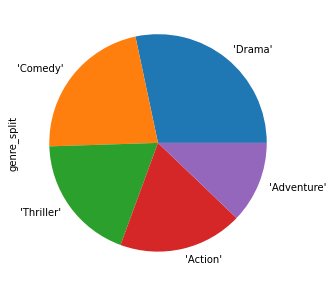

In [138]:
below_hundred['genre_split'].value_counts().nlargest(5).plot(kind='pie',
 figsize=(5,5));

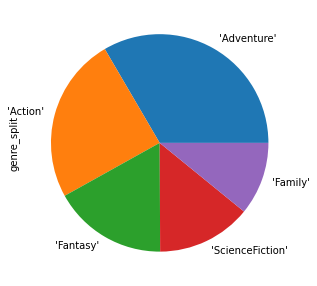

In [95]:
top_hundred['genre_split'].value_counts().nlargest(5).plot(kind='pie', figsize=(5,5));

Movies that make less revenue are Dramas, Comedies, and Thrillers.

The top 100 revenue producing movies are Adventure, Action, and Fantasy.